In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
from IPython.display import Image
import cv2
from sklearn.model_selection import train_test_split
from google.colab import drive

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,Input
from keras.layers import concatenate,GlobalAveragePooling2D, AveragePooling2D,GlobalMaxPool2D
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from PIL import Image

import tensorflow as tf
from tensorflow.keras.layers import LSTM,Embedding,Layer,ConvLSTM2D,TimeDistributed,UpSampling2D

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
y_train=pd.read_csv('/content/drive/MyDrive/Verisetleri/Bitirme_Y_train_sayi2')
y_train.head()

,Unnamed: 0,0,1
0,0,0,bademIcKurdu
1,1,0,bademIcKurdu
2,2,0,bademIcKurdu
3,3,0,bademIcKurdu
4,4,0,bademIcKurdu


In [7]:
y_train=y_train.drop('Unnamed: 0',axis=1)
y_train.columns =['id', 'ad']
y_train.head()

,id,ad
0,0,bademIcKurdu
1,0,bademIcKurdu
2,0,bademIcKurdu
3,0,bademIcKurdu
4,0,bademIcKurdu


In [ ]:
y_train=pd.DataFrame(y_train, columns= ['id'])

In [ ]:
x_train=np.load('/content/drive/MyDrive/Verisetleri/Bitirme_X_train_150x150.npy')

In [ ]:
x_train.shape

(13454, 150, 150, 3)

In [ ]:
y_test=pd.read_csv('/content/drive/MyDrive/Verisetleri/Bitirme_Y_test_sayi2')

In [ ]:
y_test.head()

,Unnamed: 0,0,1
0,0,19,ALTERNARIA
1,1,19,ALTERNARIA
2,2,19,ALTERNARIA
3,3,19,ALTERNARIA
4,4,19,ALTERNARIA


In [ ]:
y_test=y_test.drop('Unnamed: 0',axis=1)

In [ ]:
y_test.columns =['id', 'ad']

In [ ]:
y_test=pd.DataFrame(y_test, columns= ['id'])

In [ ]:
y_test.head()

,id
0,19
1,19
2,19
3,19
4,19


In [ ]:
#y_test=pd.DataFrame(y_test, columns= ['ad'])

In [ ]:
x_test=np.load('/content/drive/MyDrive/Verisetleri/Bitirme_X_test_150x150.npy')

In [ ]:
x_test.shape

(1498, 150, 150, 3)

In [ ]:
Id_Gen = {0:'Badem İç Kurdu', 1:'THRIPSLER',2:'Kırmızı Örümcekler(Akarlar)',3:'Yeşil Kurt',4:'Armut Kaplanı',5:'Ekin Bambul Böcegi',
          6:'Tel Kurdu',7:'Amerikan Beyaz Kelebeği',8:'Teke Böcekleri',9:'Yaprak Bitleri',10:'Koşnil',11:'Bakla Zınnı',12:'Bağ Yaprak Uyuzu',
          13:'Beyaz Sinek',14:'Ağaç Sarı Kurdu',15:'Ağaç Kızıl Kurdu',16:'Akdeniz Meyve Sineği',17:'Ağ Kurdu',18:'Dana Burnu',19:'ALTERNARIA'}

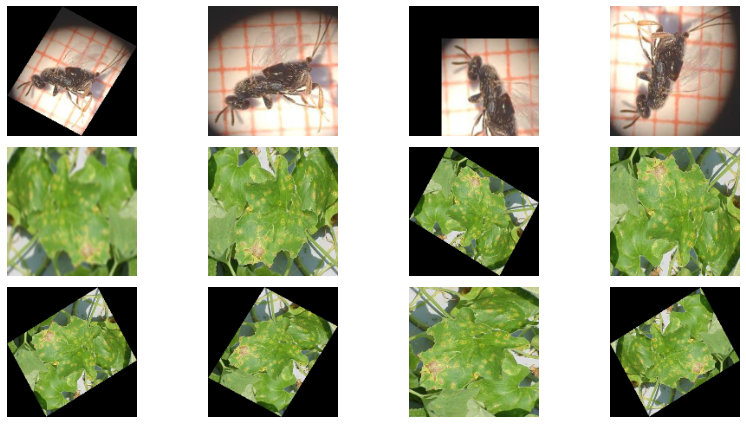

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(10,22):
  plt.subplot(3, 4, i-9)
  plt.axis('off')

  plt.imshow(x_train[i])

plt.tight_layout()
plt.show()

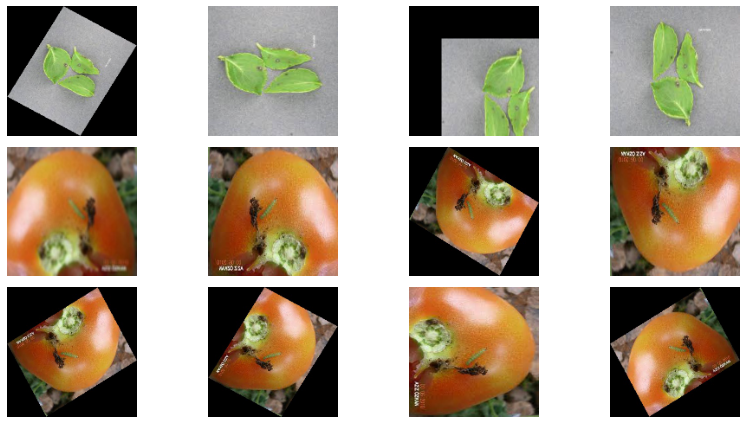

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(10,22):
  plt.subplot(3, 4, i-9)
  plt.axis('off')

  plt.imshow(x_test[i])

plt.tight_layout()
plt.show()

In [ ]:
n_classes = 20
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

Shape before one-hot encoding:  (13454, 1)


In [ ]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

çıkış resim boyutu=((n+2p-f)/s)+1 \\
p=(f-1)/2 \\
n=filtre sayısı \\
p=padding sayısı \\
f=filtre sayısı \\
s=stride adımı

In [ ]:
input_layer = Input(shape=(150, 150, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)




conv_1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(32, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(32, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(96, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)



conv_1x1 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(208, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(48, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(224, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)



conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(256, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(144, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(288, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)







conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)

x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)


conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(384, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(384, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(48, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)
x = Dropout(0.05)(x)



bottleneck = GlobalMaxPool2D()(x)

x = Flatten()(bottleneck)
x1 = Dense(128,activation='relu')(bottleneck)
x1 = Dense(20,activation='sigmoid',name='cikis')(x1)

In [ ]:
model = Model(inputs=input_layer, outputs=[x1])
model.compile(optimizer='Adam', loss=['categorical_crossentropy'])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1258 (Conv2D)            (None, 75, 75, 64)   9472        input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_291 (MaxPooling2D (None, 38, 38, 64)   0           conv2d_1258[0][0]                
__________________________________________________________________________________________________
conv2d_1259 (Conv2D)            (None, 38, 38, 64)   4160        max_pooling2d_291[0][0]          
___________________________________________________________________________________________

In [ ]:
epochs =10
batchSize =150

# modeli çalıştır
callbacks = [ModelCheckpoint("./model_checkpoint",monitor='val_loss')]
history = model.fit(x_train, Y_train, epochs=epochs,batch_size=batchSize,validation_data=(x_test,Y_test),callbacks=callbacks)

Epoch 1/10
53/53 [==============================] - 28s 459ms/step - loss: 3.0304 - val_loss: 2.8995
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 2/10
53/53 [==============================] - 24s 459ms/step - loss: 2.8513 - val_loss: 2.8819
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 3/10
53/53 [==============================] - 24s 446ms/step - loss: 2.8625 - val_loss: 2.8732
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 4/10
53/53 [==============================] - 24s 448ms/step - loss: 2.8652 - val_loss: 2.8584
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 5/10
53/53 [==============================] - 24s 452ms/step - loss: 2.8301 - val_loss: 2.7475
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 6/10
53/53 [==============================] - 24s 448ms/step - loss: 2.6607 - val_loss: 2.4467
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 7/10
53/53 [==============================] - 24s 449ms/step - loss: 2.4962 - val_loss: 2.3998
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 8/10
53/53 [==============================] - 24s 450ms/step - loss: 2.3493 - val_loss: 2.2589
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 9/10
53/53 [==============================] - 24s 447ms/step - loss: 2.2353 - val_loss: 2.1249
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 10/10
53/53 [==============================] - 24s 448ms/step - loss: 2.0823 - val_loss: 2.1332
INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


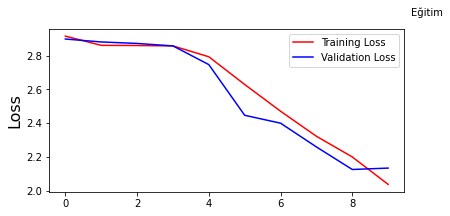

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/65452145.JPG"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/indir.jpg"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/indir (1).jpg"

test_image_original=cv2.imread(image_path)
test_image_original=cv2.cvtColor(test_image_original,cv2.COLOR_BGR2RGB)
test_image_original=cv2.resize(test_image_original,(150,150))
test_image_original=np.array(test_image_original)
test_image_original=test_image_original.reshape(-1,150,150,3)

sonuc=model.predict(test_image_original,batch_size=1)
print("Zararlı Adı:",Id_Gen[sonuc.argmax()])
print("Tahmin Oranı:%",max(sonuc[0,:])*100)

Zararlı Adı: Ağ Kurdu
Tahmin Oranı:% 96.30605578422546


In [ ]:
model.save("/content/drive/MyDrive/Model_ilkSonuc_150x150x3.h5")

In [ ]:
from keras.models import load_model

In [ ]:
model=load_model('/content/drive/MyDrive/Model_ilkSonuc_150x150x3.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/Model_ilkSonuc_150x150x3.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpeuex0m5i/assets


In [ ]:
#input_shape = Input(shape=(150, 150, 3))

#x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu')(input_shape)
#x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
#x = Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
#x = Conv2D(160, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x=Dropout(0.3)(x)
#x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
#x = Conv2D(192, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
#x = Conv2D(224, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
#x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
#x = Conv2D(256, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
#x = Conv2D(288, (3, 3), padding='same', strides=(2, 2), activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
#x=Dropout(0.25)(x)
#x=TimeDistributed(Flatten())(x)
#x=LSTM(units = 128, return_sequences=True)(x)
#x=LSTM(units = 256, return_sequences=True)(x)
#x=LSTM(units = 512, return_sequences=True)(x)
#x=LSTM(units = 1024, return_sequences=False)(x)
#x1 = Dense(128,activation='relu')(x)
#x1 = Dense(20,activation='sigmoid',name='cikis')(x1)

In [ ]:
input_shape = Input(shape=(150, 150, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_shape)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)




conv_1x1 = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(128, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(32, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(32, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(96, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)



conv_1x1 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(96, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(208, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(16, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(48, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)






conv_1x1 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(224, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)



conv_1x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(256, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(24, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(112, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(144, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(288, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(64, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(64, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)







conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)

x = MaxPool2D((3, 3), padding='same', strides=(2, 2))(x)


conv_1x1 = Conv2D(256, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(160, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(320, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(32, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)


conv_1x1 = Conv2D(384, (1, 1), padding='same', activation='relu')(x)
    
conv_3x3 = Conv2D(192, (1, 1), padding='same', activation='relu')(x)
conv_3x3 = Conv2D(384, (3, 3), padding='same', activation='relu')(conv_3x3)

conv_5x5 = Conv2D(48, (1, 1), padding='same', activation='relu')(x)
conv_5x5 = Conv2D(128, (5, 5), padding='same', activation='relu')(conv_5x5)

pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
pool_proj = Conv2D(128, (1, 1), padding='same', activation='relu')(pool_proj)

x=concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3)
x = Dropout(0.05)(x)

bottleneck = GlobalMaxPool2D()(x)


x=TimeDistributed(Flatten())(x)
x=LSTM(units = 256, return_sequences=False)(x)
x1 = Dense(128,activation='relu')(bottleneck)
x1 = Dense(20,activation='sigmoid',name='cikis')(x1)

In [ ]:
model = Model(inputs=input_shape, outputs=[x1])
model.compile(optimizer='Adam', loss=['categorical_crossentropy'])
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_2096 (Conv2D)            (None, 75, 75, 64)   9472        input_45[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_491 (MaxPooling2D (None, 38, 38, 64)   0           conv2d_2096[0][0]                
__________________________________________________________________________________________________
conv2d_2097 (Conv2D)            (None, 38, 38, 64)   4160        max_pooling2d_491[0][0]          
___________________________________________________________________________________________

In [ ]:
epochs =3
batchSize =150

# modeli çalıştır
callbacks = [ModelCheckpoint("./model_checkpoint",monitor='val_loss')]
history = model.fit(x_train, Y_train, epochs=epochs,batch_size=batchSize,validation_data=(x_test,Y_test),callbacks=callbacks)

Epoch 1/3
90/90 [==============================] - 37s 347ms/step - loss: 2.6983 - val_loss: 3.3521


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 2/3
90/90 [==============================] - 30s 329ms/step - loss: 2.1844 - val_loss: 3.6616


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


Epoch 3/3
90/90 [==============================] - 30s 329ms/step - loss: 1.9571 - val_loss: 3.3432


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


INFO:tensorflow:Assets written to: ./model_checkpoint/assets


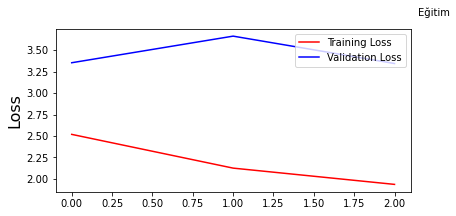

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color ='r', label='Training Loss')
plt.plot(history.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')

In [ ]:
image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/indir.jpg"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/65452145.JPG"
#image_path = "/content/drive/MyDrive/Proje 2 Denemeleri/indir (1).jpg"
test_image_original=cv2.imread(image_path)
test_image_original=cv2.cvtColor(test_image_original,cv2.COLOR_BGR2RGB)
test_image_original=cv2.resize(test_image_original,(150,150))
test_image_original=np.array(test_image_original)
test_image_original=test_image_original.reshape(-1,150,150,3)



sonuc=model.predict(test_image_original,batch_size=1)
print("Zararlı Adı:",Id_Gen[sonuc.argmax()])
print("Tahmin Oranı:%",max(sonuc[0,:])*100)

Zararlı Adı: Akdeniz Meyve Sineği
Tahmin Oranı:% 98.98436069488525


In [ ]:
model.save("/content/drive/MyDrive/Model_ikinciSonucLSTM+CNN_150x150x3.h5")

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Model_ilkSonucLSTM+CNN_150x150x3.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('/content/drive/MyDrive/Model_ilkSonuc_LSTM+CNN_150x150x3.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgb321h4c/assets


INFO:tensorflow:Assets written to: /tmp/tmpgb321h4c/assets
